# Installation

# 1. Importing

In [3]:
from sklearn import datasets
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 2. Load Dataset

In [8]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


The dataset contains 150 samples of iris flowers, with three species:

- Iris setosa
- Iris versicolor
- Iris virginica

The target variable consists of three classes corresponding to the three iris species, making it a multiclass classification problem.

# 3. Extract Features

In [10]:
X = df[['petal_length','sepal_length']].values  # Features
y = df['petal_width'].values    # Target

Models like `LinearRegression` are built to handle multiple features (columns) and expect the input to have a 2D structure

# 4. Preprocess Data

# 5. Split the Data into Training and Test Sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Create model

In [12]:
model = LinearRegression()

# 7. Train the model

In [13]:
model.fit(X_train, y_train)

LinearRegression()

# 8. Make Predictions

In [14]:
y_pred = model.predict(X_test)

# 9. Evaluate the Model

In [15]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [16]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 0.14599697011686177
Mean Squared Error (MSE): 0.03766054524064726
Root Mean Squared Error (RMSE): 0.1940632506185735
R² Score: 0.9408431815195083


# 10. Visualization

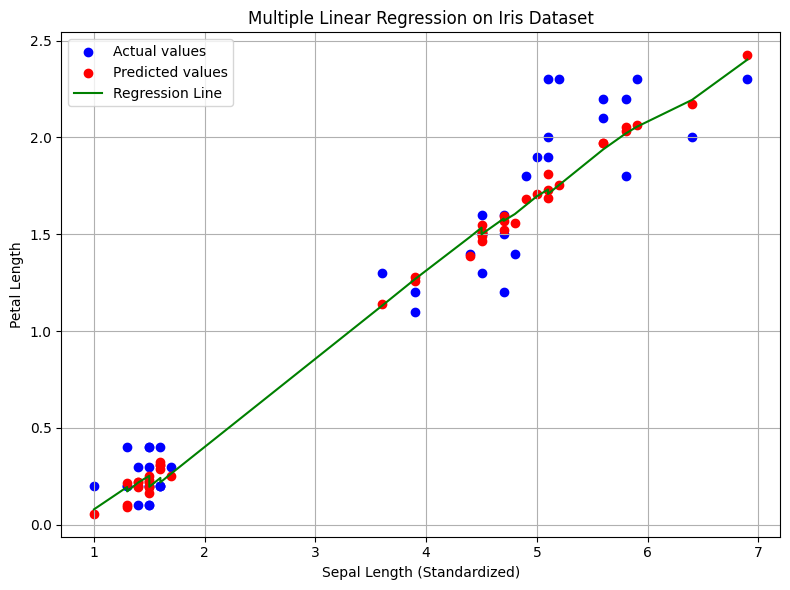

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual values')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted values')
# Plotting the regression line using sorted values for better visualization
X_sorted = np.sort(X_test[:, 0])
y_sorted = model.predict(np.column_stack((X_sorted, np.sort(X_test[:, 1]))))
plt.plot(X_sorted, y_sorted, color='green', label='Regression Line')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Petal Length')
plt.title('Multiple Linear Regression on Iris Dataset')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. Multiple Linear Regression

In [19]:
beta0 = model.intercept_  # Intercept
beta1 = model.coef_[0]   # Slope 1
beta2 = model.coef_[1]   # Slope 2
print(f"Regression Line Equation: Y = {beta0} + {beta1} * X1 + {beta2} X2")

Regression Line Equation: Y = 0.12118232981881216 + 0.4612208913488632 * X1 + -0.11420426222518881 X2
